# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

C:\Users\BramUser\AppData\Local\Temp\ipykernel_57232\2438761054.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired')
c:\Users\BramUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\BramUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


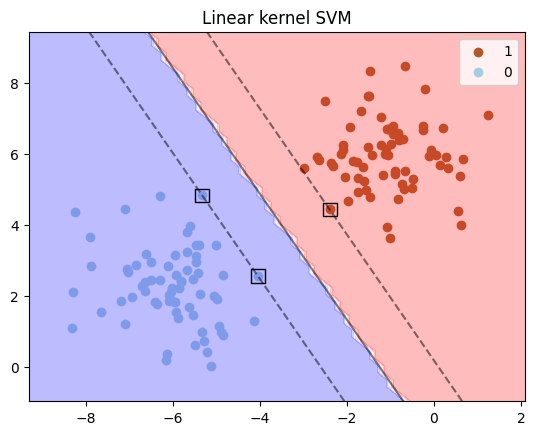

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# BOY DOET DIT

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>
A RBF kernel should be used when the data cannot be linearly separated. For example, in the data above, a linear line can perfectly separate the data and can therefore be used. However, for many data, there is not one single line which can perfectly separate the data. This is especially the case for high-dimensional data. To conclude, a RBF kernel should be preferred over a linear kernel when the data is not linearly separable and/or the data is high-dimensional.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>
Yes, kernel functions compute differences between data points, and these are sensitive to the scale at which the variable was computed (i.e., variables with a higher scale will have a greater overall impact on the distance between data points). To prevent one variable from dominantly occuring in the distance computation, the data should be properly scaled.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score

# Initialize model
svc = svm.SVC(random_state=42)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", svc)
])

# Specify hyperparameters
C = np.logspace(-3, 3, 7)
kernel = ("linear", "rbf")
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
parameters = {"clf__kernel": kernel, "clf__C": C, "clf__gamma": gamma}

# Binarize drug response to make it categorical
drug_response_z = (drug_response["YM155"] - drug_response["YM155"].mean()) / drug_response["YM155"].std()
drug_response_binary = drug_response_z.apply(lambda x: 1 if x > 0 else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response_binary, test_size=0.33, 
                                                    stratify=drug_response_binary, random_state=42)

# Construct Grid Search
grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring="precision", cv=5)

# Fit classifier
grid_search.fit(X_train, y_train)

# Print best parameters
for param in ["clf__kernel", "clf__C", "clf__gamma"]:
    print(f"Best {param}: {grid_search.best_params_[param]}")

# Print highest score
print(f"Best score: {grid_search.best_score_}")

# Calculate precision on test set
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f"Precision on test set: {precision}")

print(classification_report(y_test, y_pred))

# DIT DOE IK

c:\Users\BramUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\BramUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\BramUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\BramUser\A

Best clf__kernel: linear
Best clf__C: 0.01
Best clf__gamma: 0.001
Best score: 0.8311111111111111
Precision on test set: 0.5384615384615384
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        28
           1       0.54      0.33      0.41        21

    accuracy                           0.59        49
   macro avg       0.57      0.56      0.55        49
weighted avg       0.58      0.59      0.57        49



## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

In [7]:
# Initialize RandomForest model
rf = RandomForestClassifier(oob_score=True, bootstrap=True, random_state=42)

# Initialize pipeline
pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),  # Scaling features
    ("clf", rf)                    # RandomForest classifier
])

# Simplified hyperparameter grid
parameters = {
    'clf__n_estimators': [100, 300],  
    'clf__max_depth': np.arange(1, 10),
    'clf__min_samples_leaf': [1, 2]
}

# Construct Grid Search
grid_search = GridSearchCV(estimator=pipeline_rf, param_grid=parameters, scoring="precision")

# Fit classifier
grid_search.fit(X_train, y_train)

# # Print best parameters
for param in list(parameters.keys()):
    print(f"Best {param}: {grid_search.best_params_[param]}")

# Print highest score
print(f"Best score: {grid_search.best_score_}")

# Calculate precision on test set
best_estimator_rf = grid_search.best_estimator_

y_pred = best_estimator_rf.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f"Precision on test set: {precision}")

print(classification_report(y_test, y_pred))

# DIT DOE IK

Best clf__n_estimators: 100
Best clf__max_depth: 3
Best clf__min_samples_leaf: 1
Best score: 0.7866666666666667
Precision on test set: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        28
           1       0.57      0.38      0.46        21

    accuracy                           0.61        49
   macro avg       0.60      0.58      0.58        49
weighted avg       0.60      0.61      0.60        49



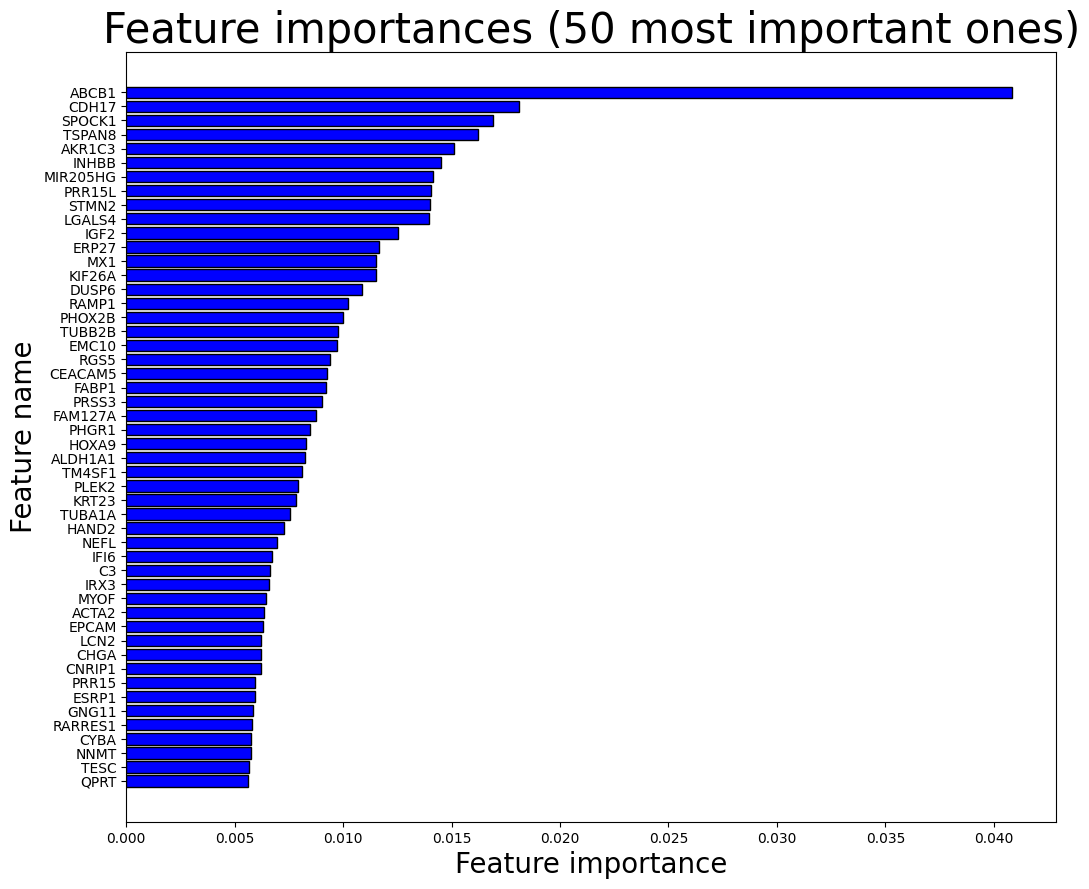

In [8]:
# Implement
def rf_feature_importance(X, y):
    """ Compute the feature importances for the given data as described above.
    Args:
        X: the input features
        y: the target variable
    Returns:
        A tuple containing the feature names and their importances, sorted by importance.
    """
    # Initialize and fit RandomForestRegressor -- with best parameters
    rf_reg = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6, min_samples_leaf=1)
    rf_reg.fit(X, y)

    # Get feature importances & feature names
    feat_imps = rf_reg.feature_importances_
    feat_names = rf_reg.feature_names_in_

    # Function to sort two lists based on one list, in descending order
    def sort_x_y(x, y):
        
        # Get the sorted indices of y
        sorted_indices = sorted(range(len(y)), key=lambda i: y[i], reverse=True)

        # Rearrange x and y based on the sorted indices
        sorted_x = [x[i] for i in sorted_indices]
        sorted_y = [y[i] for i in sorted_indices]

        # Return
        return sorted_x, sorted_y

    # Sort
    feat_names_sort, feat_imps_sort = sort_x_y(feat_names, feat_imps)

    # Only get the first 50 items
    nr_items = min(50, len(feat_names_sort))
    feat_names_sort, feat_imps_sort = feat_names_sort[:nr_items], feat_imps_sort[:nr_items]

    # Get feature 
    return feat_names_sort, feat_imps_sort

def plot_feature_importance(features, importances):
    """ Plot the features and their importances as a bar chart in order of importance.
    Args:
        features: the feature names, ordered by importance
        importances: the feature importances
    """

    plt.figure(figsize=(12, 10))
    plt.barh(y=features[::-1], width=importances[::-1], color="blue", edgecolor="black")
    plt.yticks(ticks=range(len(features)), labels=features[::-1], fontsize=10)
    plt.xticks(fontsize=10)
    plt.title("Feature importances (50 most important ones)", fontsize=30)
    plt.xlabel("Feature importance", fontsize=20)
    plt.ylabel("Feature name", fontsize=20)
    
    plt.show()

features, importances = rf_feature_importance(X_train, y_train)
plot_feature_importance(features, importances)

# DIT DOE IK

Random Forest performs slightly better overall, particularly for the minority class (class 1), with a higher precision, recall, and F1-score than the SVM. However, both models struggle to correctly identify class 1 instances, as shown by their low recall scores (0.33 for SVM and 0.38 for Random Forest). In terms of overall performance, Random Forest is slightly better in handling class imbalance but still faces challenges with the minority class.

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

In [9]:

# DIT DOET BOY, LEES ALLEMAAL DOOR EN AANPASSEN!!!